In [1]:
from google_drive_downloader import GoogleDriveDownloader
GoogleDriveDownloader.download_file_from_google_drive(file_id='1NvTyhUsrFbL91E10EPm38IjoCg6E2c6q',dest_path='/tmp/Cyclone_Wildfire_Flood_Earthquake_Database.zip', unzip=True)

Unzipping...Done.


In [2]:
import os                                                                       
import zipfile                                                                  

local_zip = '/tmp/Cyclone_Wildfire_Flood_Earthquake_Database.zip'               
zip_ref = zipfile.ZipFile(local_zip, 'r')                                       
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
dir_cyclone = os.path.join('/tmp/Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone')
dir_earthquake = os.path.join('/tmp/Cyclone_Wildfire_Flood_Earthquake_Database/Earthquake')
dir_flood = os.path.join('/tmp/Cyclone_Wildfire_Flood_Earthquake_Database/Flood')
dir_wildfire = os.path.join('/tmp/Cyclone_Wildfire_Flood_Earthquake_Database/Wildfire')

print('Dataset Cyclone :', len(os.listdir(dir_cyclone)))
print('Dataset Earthquake :', len(os.listdir(dir_earthquake)))
print('Dataset Flood :', len(os.listdir(dir_flood)))
print('Dataset Wildfire :', len(os.listdir(dir_wildfire)))


cyclone_name = os.listdir(dir_cyclone)                                          
print('Cyclone File Names : ', cyclone_name[:5])                                   

earthquake_name = os.listdir(dir_earthquake)                                          
print('Earthquake File Names : ', earthquake_name[:5])                                   

flood_name = os.listdir(dir_flood)                                          
print('Flood File Names : ', flood_name[:5])                                   

wildfire_name = os.listdir(dir_wildfire)                                          
print('Wildfire File Names : ', wildfire_name[:5])

Dataset Cyclone : 928
Dataset Earthquake : 1350
Dataset Flood : 1073
Dataset Wildfire : 1077
Cyclone File Names :  ['703.jpg', '458.jpg', '576.jpg', '89.jpg', '490.jpg']
Earthquake File Names :  ['703.jpg', '458.jpg', '576.jpg', '89.jpg', '1283.jpg']
Flood File Names :  ['703.jpg', '458.jpg', '576.jpg', '89.jpg', '490.jpg']
Wildfire File Names :  ['703.jpg', '458.jpg', '576.jpg', '89.jpg', '490.jpg']


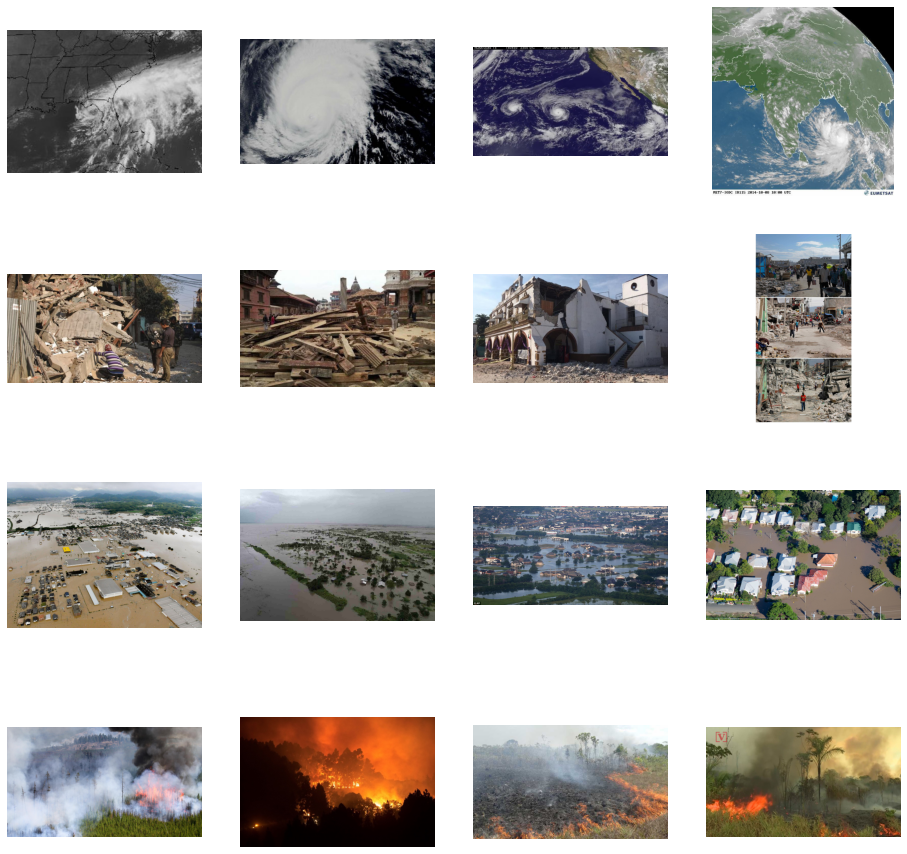

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4
index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

index += 4
cyclone_pic = [os.path.join(dir_cyclone, name) 
                for name in cyclone_name[index-4:index]]
earthquake_pic = [os.path.join(dir_earthquake, name) 
                for name in earthquake_name[index-4:index]]
flood_pic = [os.path.join(dir_flood, name) 
                for name in flood_name[index-4:index]]
wildfire_pic = [os.path.join(dir_wildfire, name) 
                for name in wildfire_name[index-4:index]]


for i, img_path in enumerate(cyclone_pic+earthquake_pic+flood_pic+wildfire_pic):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
last_layer = pre_trained_model.get_layer('mixed8')

x = last_layer.output
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers. Dense (4, activation='softmax')(x)

model = Model(pre_trained_model.input, x)
model.compile(optimizer = Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics = ['accuracy'])

--2021-05-19 03:01:54--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.80, 172.217.13.240, 172.217.9.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   229MB/s    in 0.4s    

2021-05-19 03:01:54 (229 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [9]:
base_dir = '/tmp/Cyclone_Wildfire_Flood_Earthquake_Database/'
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.17)                                                   
validation_datagen = ImageDataGenerator(
    rescale=1./255,                                                           
    validation_split=0.17)
train_generator = train_datagen.flow_from_directory(
	base_dir,                                                                     
	target_size=(150,150),                                                        
	class_mode='categorical',                                                     
  batch_size=64,
  shuffle = True,                                                                                                                               
  subset = 'training'                                                           
)

validation_generator = validation_datagen.flow_from_directory(                  
	base_dir,                                                                     
	target_size=(150,150),                                                        
	class_mode='categorical',                                                     
  batch_size=64,  
  shuffle = True,                                                               
  subset = 'validation'                                                         
)

Found 3677 images belonging to 4 classes.
Found 751 images belonging to 4 classes.


In [10]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
58/58 [==============================] - 156s 2s/step - loss: 0.8828 - accuracy: 0.6284 - val_loss: 0.2439 - val_accuracy: 0.9161
Epoch 2/30
58/58 [==============================] - 112s 2s/step - loss: 0.2708 - accuracy: 0.9058 - val_loss: 0.2662 - val_accuracy: 0.8961
Epoch 3/30
58/58 [==============================] - 108s 2s/step - loss: 0.2550 - accuracy: 0.9072 - val_loss: 0.2336 - val_accuracy: 0.9055
Epoch 4/30
58/58 [==============================] - 108s 2s/step - loss: 0.2096 - accuracy: 0.9280 - val_loss: 0.1798 - val_accuracy: 0.9308
Epoch 5/30
58/58 [==============================] - 108s 2s/step - loss: 0.2385 - accuracy: 0.9175 - val_loss: 0.2187 - val_accuracy: 0.9201
Epoch 6/30
58/58 [==============================] - 108s 2s/step - loss: 0.2384 - accuracy: 0.9173 - val_loss: 0.1780 - val_accuracy: 0.9254
Epoch 7/30
58/58 [==============================] - 107s 2s/step - loss: 0.2021 - accuracy: 0.9239 - val_loss: 0.1581 - val_accuracy: 0.9414
Epoch 8/30
58

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fn in uploaded.keys():
  path=fn
  img=image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving flood2.jpeg to flood2.jpeg
flood2.jpeg
[[0. 0. 1. 0.]]
